In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

diabetes_df= pd.read_csv('diabetes.csv')
diabetes_df.shape

diabetes_df['SkinThickness']=diabetes_df['SkinThickness'].replace(0,np.NaN)
diabetes_df['Insulin']=diabetes_df['Insulin'].replace(0,np.NaN)
diabetes_df['BMI']=diabetes_df['BMI'].replace(0,np.NaN)
diabetes_df['BloodPressure']=diabetes_df['BloodPressure'].replace(0,np.NaN)

diabetes_df.isnull().sum()

missing_values_df=pd.DataFrame({'Column_name':diabetes_df.columns,
                                'missing_count':diabetes_df.isnull().sum(),
                              'percentage_missing_values':diabetes_df.isnull().sum()/diabetes_df.shape[0]*100})

num_cols= [col for col in diabetes_df.columns if diabetes_df[col].dtype== 'int64' or diabetes_df[col].dtype=='float64']

cat_cols= [col for col in diabetes_df.columns if diabetes_df[col].dtype=='object']

diabetes_df['Pregnancies']=diabetes_df['Pregnancies'].astype(object)

y=diabetes_df['Outcome']

diabetes_df.drop(columns='Outcome', inplace=True)

X_train,X_test,y_train,y_test= train_test_split(diabetes_df,y,test_size=0.2,random_state=26)

#Filling missing values:

for col in X_train.columns:
    if X_train[col].dtype==object:
        X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
        X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
    else:
        X_train[col]=X_train[col].fillna(X_train[col].mean())
        X_test[col]=X_test[col].fillna(X_train[col].mean())
X_train
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
294,0,161,50.0,29.183066,153.236593,21.9,0.254,65
559,11,85,74.0,29.183066,153.236593,30.1,0.300,35
103,1,81,72.0,18.000000,40.000000,26.6,0.283,24
532,1,86,66.0,52.000000,65.000000,41.3,0.917,29
660,10,162,84.0,29.183066,153.236593,27.7,0.182,54
...,...,...,...,...,...,...,...,...
77,5,95,72.0,33.000000,153.236593,37.7,0.370,27
723,5,117,86.0,30.000000,105.000000,39.1,0.251,42
102,0,125,96.0,29.183066,153.236593,22.5,0.262,21
432,1,80,74.0,11.000000,60.000000,30.0,0.527,22


In [3]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

for col in X_train.columns:
    if (X_train[col].dtype!=object):
        X_train[col]=min_max.fit_transform(X_train[[col]])
        X_test[col]=min_max.transform(X_test[[col]])
        
X_train

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
294,0,0.809045,0.265306,0.241120,0.165345,0.075665,0.078187,0.733333
559,11,0.427136,0.510204,0.241120,0.165345,0.243354,0.098623,0.233333
103,1,0.407035,0.489796,0.119565,0.028916,0.171779,0.091071,0.050000
532,1,0.432161,0.428571,0.489130,0.059036,0.472393,0.372723,0.133333
660,10,0.814070,0.612245,0.241120,0.165345,0.194274,0.046202,0.550000
...,...,...,...,...,...,...,...,...
77,5,0.477387,0.489796,0.282609,0.165345,0.398773,0.129720,0.100000
723,5,0.587940,0.632653,0.250000,0.107229,0.427403,0.076855,0.350000
102,0,0.628141,0.734694,0.241120,0.165345,0.087935,0.081741,0.000000
432,1,0.402010,0.510204,0.043478,0.053012,0.241309,0.199467,0.016667


In [4]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

comp_df=pd.DataFrame({'Actual_values':y_test,'Predicted':y_pred})

comp_df

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Actual_values,Predicted
355,1,1
123,0,0
551,0,0
586,1,1
114,1,1
...,...,...
379,0,0
297,0,0
286,0,1
222,0,0


In [5]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

y_pred_proba

array([0.63963161, 0.36216053, 0.18122449, 0.56541633, 0.63251234,
       0.21392655, 0.53619429, 0.1143163 , 0.74695912, 0.28999398,
       0.24690067, 0.11714465, 0.5443213 , 0.53248736, 0.40131707,
       0.13958019, 0.28056093, 0.22362464, 0.27375617, 0.57074014,
       0.17926468, 0.32007249, 0.16062747, 0.23975447, 0.15351261,
       0.71894475, 0.40002923, 0.14783901, 0.38925824, 0.19044118,
       0.19858664, 0.47540231, 0.17696864, 0.76469489, 0.2468743 ,
       0.6856352 , 0.65845202, 0.21180347, 0.91149138, 0.05853064,
       0.35359636, 0.2852791 , 0.74199453, 0.77096475, 0.26551031,
       0.39773037, 0.60034754, 0.31472234, 0.17729502, 0.40085   ,
       0.17606426, 0.75368062, 0.17924314, 0.33454777, 0.31936649,
       0.09853301, 0.30322239, 0.28619751, 0.21726676, 0.38678527,
       0.40005256, 0.08672922, 0.37662306, 0.65671925, 0.46614995,
       0.77938661, 0.21335079, 0.23954167, 0.17488452, 0.16746208,
       0.49712935, 0.85111803, 0.35069765, 0.24198129, 0.30221

In [6]:
## Creating the confusion matrix

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

confusion_matrix(y_test,y_pred)
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)


0.651685393258427

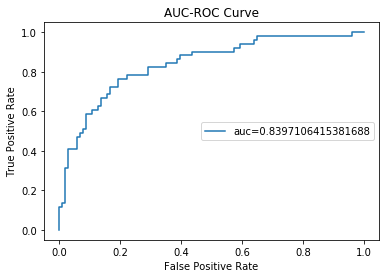

In [8]:
import matplotlib.pyplot as plt

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=5)
plt.show()